In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_excel('Base/LT_TOBE_B1000.xlsx', sheet_name='Sheet1')
data_c1 = pd.read_excel('SC1/LT_TOBE_B1000.xlsx', sheet_name='Sheet1')
data_c2 = pd.read_excel('SC2/LT_TOBE_B1000.xlsx', sheet_name='Sheet1')
data_c3 = pd.read_excel('SC3/LT_TOBE_B1000.xlsx', sheet_name='Sheet1')

In [3]:
data = data.iloc[::2]
data_c1 = data_c1.iloc[::2]
data_c2 = data_c2.iloc[::2]
data_c3 = data_c3.iloc[::2]

In [4]:
print(data.head(10))

    Time    Time_A    Time_B    Time_C  Time_D    Time_E  Time_F    Time_G  \
0      0  0.000000  0.000000  0.000000     0.0  0.000000     0.0  0.000000   
2      5  4.200000  3.800000  4.000000     0.0  3.200000     0.0  0.000000   
4     10  4.533333  4.666667  4.333333     6.5  4.266667     5.7  6.333333   
6     15  4.600000  4.920000  4.600000     6.5  4.680000     5.7  6.800000   
8     20  4.628571  5.028571  5.000000     6.5  5.266667     5.7  6.933333   
10    25  4.644444  5.022222  5.375000     6.5  5.675000     5.7  6.914286   
12    30  4.654545  5.036364  5.800000     6.5  6.060000     5.7  7.355556   
14    35  4.661538  5.076923  5.909091     6.5  6.254545     5.7  7.781818   
16    40  4.666667  5.066667  6.384615     6.5  6.738462     5.7  8.116667   
18    45  4.670588  5.070588  6.866667     6.5  7.186667     5.7  8.585714   

      Time_H  
0   0.000000  
2   3.600000  
4   3.266667  
6   3.833333  
8   3.657143  
10  3.780000  
12  3.727273  
14  3.738462  
16  3.

Text(0, 0.5, 'Lead Time')

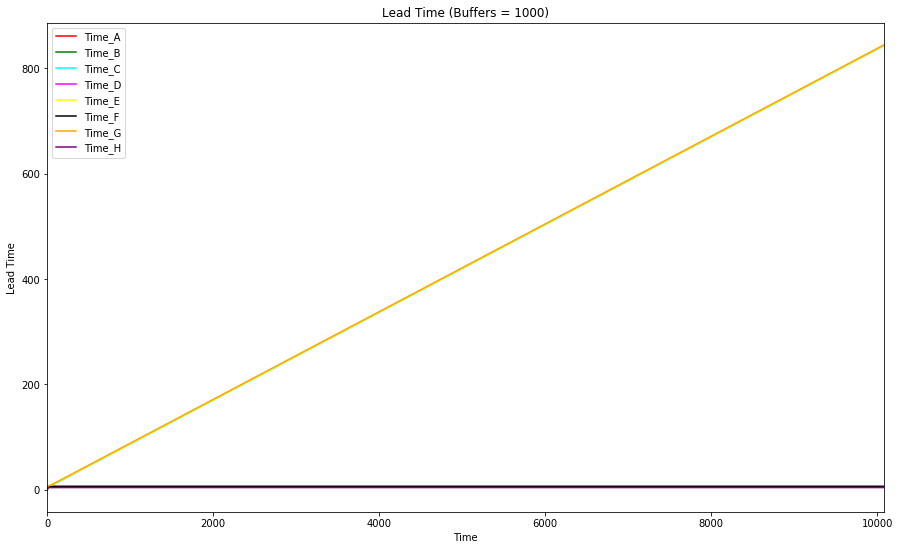

In [5]:
ax = plt.gca()


data.plot(kind='line',x='Time',y='Time_A', color='red', ax=ax,figsize=(15, 9))
data.plot(kind='line',x='Time',y='Time_B', color='green', ax=ax)
data.plot(kind='line',x='Time',y='Time_C', color='cyan', ax=ax)
data.plot(kind='line',x='Time',y='Time_D', color='magenta', ax=ax)
data.plot(kind='line',x='Time',y='Time_E', color='yellow', ax=ax)
data.plot(kind='line',x='Time',y='Time_F', color='black', ax=ax)
data.plot(kind='line',x='Time',y='Time_G', color='orange', ax=ax)
data.plot(kind='line',x='Time',y='Time_H', color='purple', ax=ax)
plt.title('Lead Time (Buffers = 1000)')
plt.xlabel('Time')
plt.ylabel('Lead Time')

In [6]:
data.mean()

Time      5040.000000
Time_A       4.696483
Time_B       5.128294
Time_C     422.920672
Time_D       6.493555
Time_E     423.356913
Time_F       5.694348
Time_G     424.552526
Time_H       3.829985
dtype: float64

In [7]:
data_sliced = data.drop('Time', 1)


Text(0, 0.5, 'Lead Time')

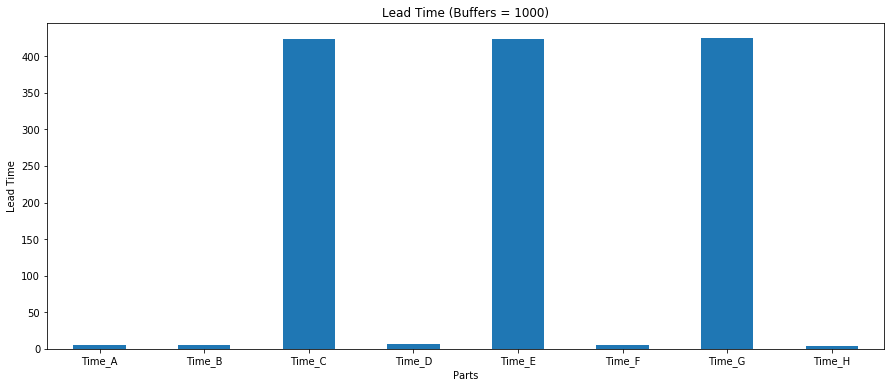

In [8]:
data_sliced.mean().plot.bar(rot=0, figsize=(15,6))
plt.title('Lead Time (Buffers = 1000)')
plt.xlabel('Parts')
plt.ylabel('Lead Time')

Text(0, 0.5, 'Lead Time')

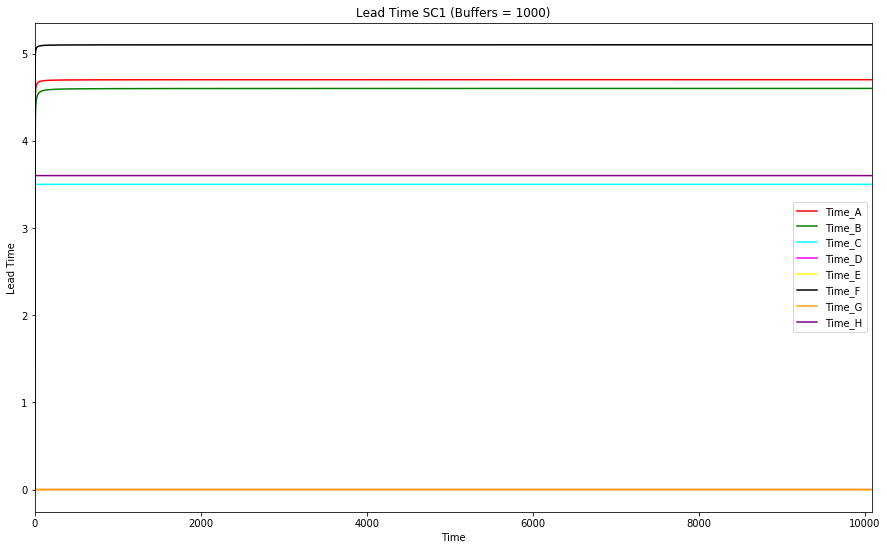

In [9]:
ax = plt.gca()


data_c2.plot(kind='line',x='Time',y='Time_A', color='red', ax=ax,figsize=(15, 9))
data_c2.plot(kind='line',x='Time',y='Time_B', color='green', ax=ax)
data_c2.plot(kind='line',x='Time',y='Time_C', color='cyan', ax=ax)
data_c2.plot(kind='line',x='Time',y='Time_D', color='magenta', ax=ax)
data_c2.plot(kind='line',x='Time',y='Time_E', color='yellow', ax=ax)
data_c2.plot(kind='line',x='Time',y='Time_F', color='black', ax=ax)
data_c2.plot(kind='line',x='Time',y='Time_G', color='orange', ax=ax)
data_c2.plot(kind='line',x='Time',y='Time_H', color='purple', ax=ax)
plt.title('Lead Time SC1 (Buffers = 1000)')
plt.xlabel('Time')
plt.ylabel('Lead Time')

Text(0, 0.5, 'Lead Time')

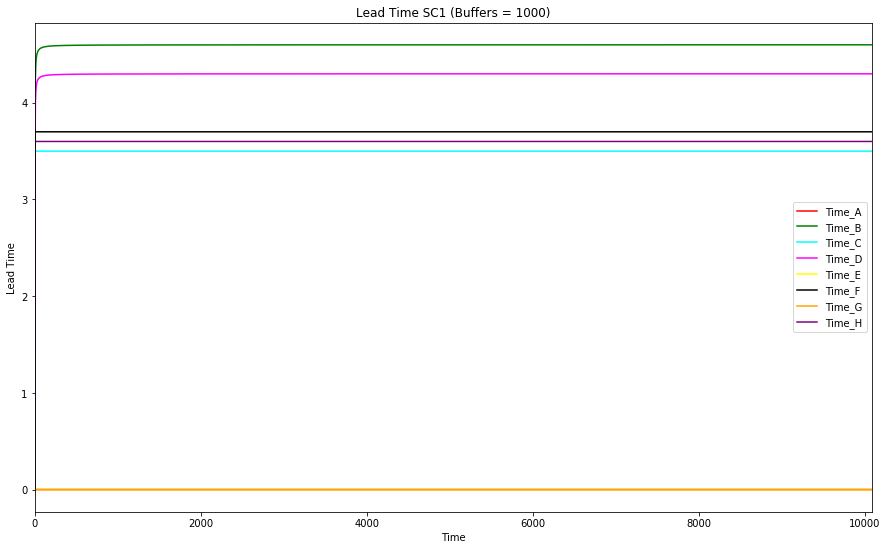

In [10]:
ax = plt.gca()


data_c3.plot(kind='line',x='Time',y='Time_A', color='red', ax=ax,figsize=(15, 9))
data_c3.plot(kind='line',x='Time',y='Time_B', color='green', ax=ax)
data_c3.plot(kind='line',x='Time',y='Time_C', color='cyan', ax=ax)
data_c3.plot(kind='line',x='Time',y='Time_D', color='magenta', ax=ax)
data_c3.plot(kind='line',x='Time',y='Time_E', color='yellow', ax=ax)
data_c3.plot(kind='line',x='Time',y='Time_F', color='black', ax=ax)
data_c3.plot(kind='line',x='Time',y='Time_G', color='orange', ax=ax)
data_c3.plot(kind='line',x='Time',y='Time_H', color='purple', ax=ax)
plt.title('Lead Time SC1 (Buffers = 1000)')
plt.xlabel('Time')
plt.ylabel('Lead Time')

In [11]:
data_c1 = data_c1.drop('Time',1)
data_c1 = data_c1.mean()
data_c2 = data_c2.drop('Time',1)
data_c2 = data_c2.mean()
data_c3 = data_c3.drop('Time',1)
data_c3 = data_c3.mean()
data_c3_df = data_c3.to_frame()
data_c3_df = data_c3_df.T

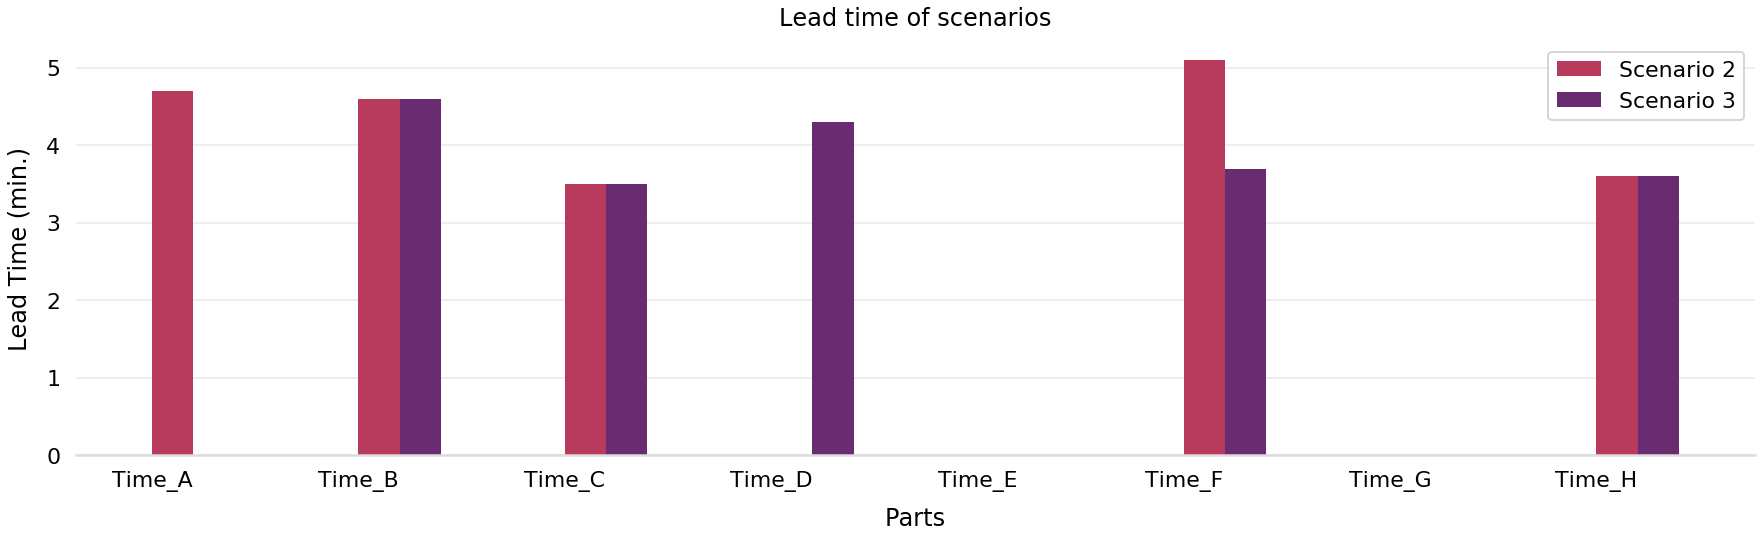

In [12]:
import seaborn as sns
sns.set_context('poster')

fig, ax = plt.subplots(figsize=(25, 8))

x = np.arange(len(data_c3_df.columns))

bar_width = 0.2

#b0 = ax.bar(x, data_sliced.mean(), width=bar_width,color="#f9ed69",label ='Base')
#b1 = ax.bar(x + bar_width, data_c1,width=bar_width,color="#f08a5d", label='Scenario 1')
b2 = ax.bar(x + 2*bar_width, data_c2, width=bar_width,color="#b83b5e",label='Scenario 2')
b3 = ax.bar(x + 3*bar_width, data_c3, width=bar_width,color="#6a2c70",label='Scenario 3')



# Fix the x-axes.
ax.set_xticks(x + 1.5*bar_width)
ax.set_xticklabels(data_c3_df.columns)

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Parts', labelpad=15)
ax.set_ylabel('Lead Time (min.)', labelpad=15)
ax.set_title('Lead time of scenarios', pad=15)

ax.legend()

fig.tight_layout()
plt.savefig('LT_TOBE_wbase.png', transparent=True, dpi=200)

In [13]:
data_c3.mean()

2.4607155576579918

In [14]:
data_sliced.mean().mean()/377

0.4299312915266405